<a href="https://colab.research.google.com/github/ajdhiman/Deep-Learning/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Dataset

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
mnist = tf.keras.datasets.mnist

In [6]:
(xTrainFull, yTrainFull),(xTest, yTest) = mnist.load_data()

In [7]:
xTrainFull.shape

(60000, 28, 28)

In [8]:
xTrainFull[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
yTrainFull[0]

5

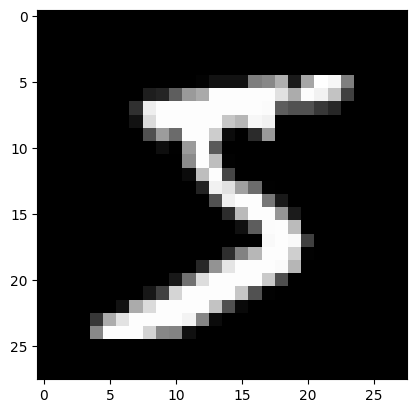

In [10]:
plt.imshow(xTrainFull[0],cmap="gray")

<Axes: >

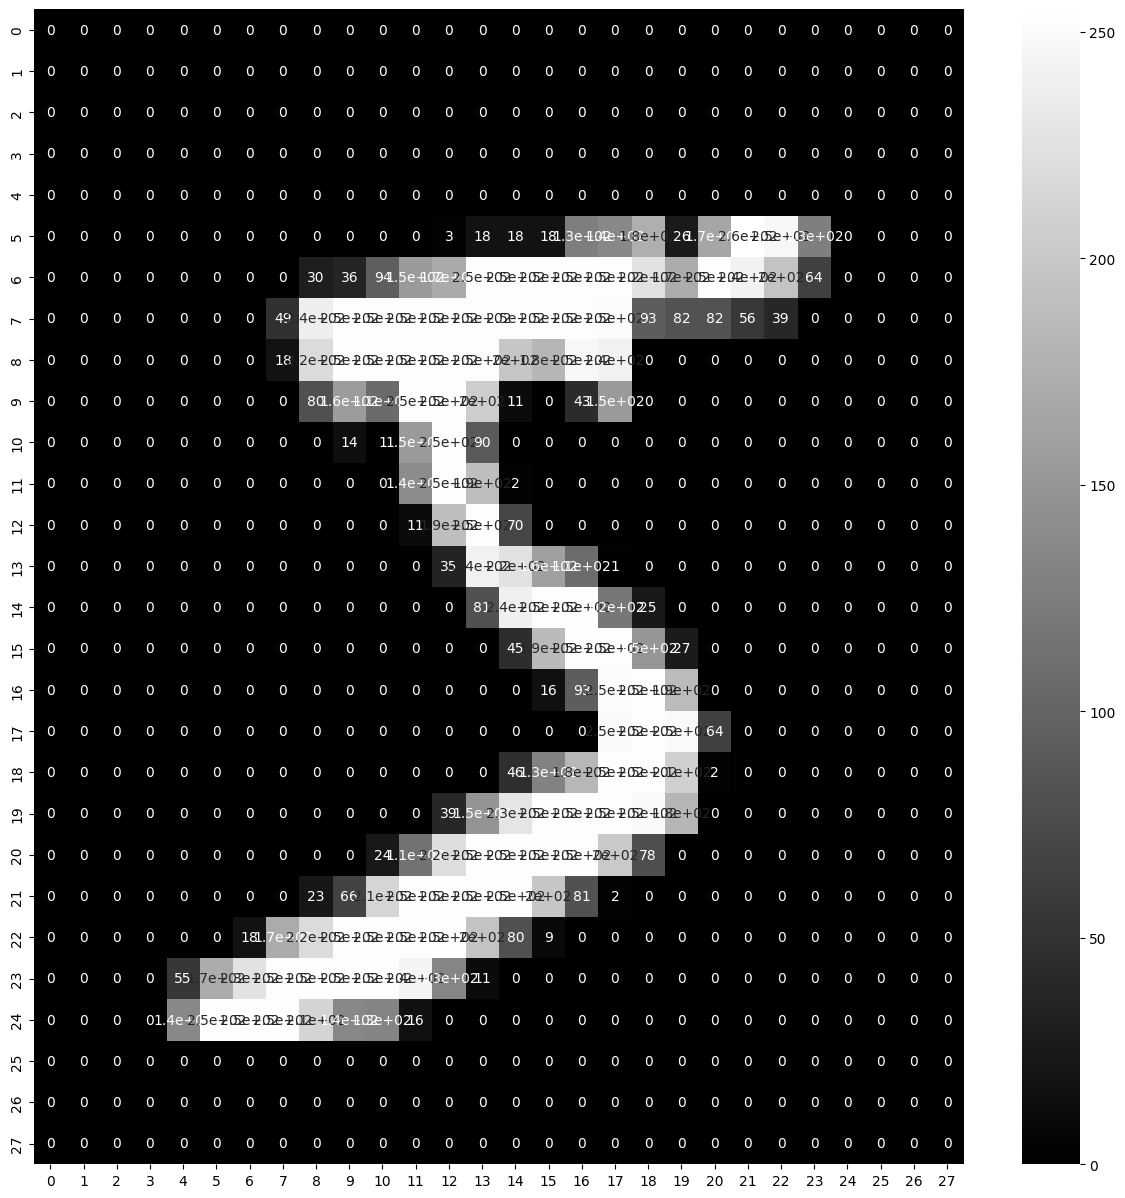

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(xTrainFull[0],
            annot=True,
            cmap="gray")

In [13]:
xValid, xTrain =  xTrainFull[:5000]/255, xTrainFull[5000:]/255
yValid, yTrain =  yTrainFull[:5000], yTrainFull[5000:]

xTest = xTest/255

In [17]:
classes = len(np.unique(yTrain))

In [18]:
layers=[
    tf.keras.layers.Flatten(input_shape=(28,28),name="inputlayer"),
    tf.keras.layers.Dense(300, activation="relu", name="hiddenlayer1"),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenlayer2"),
    tf.keras.layers.Dense(classes, activation="softmax", name="outputLayer"),
]

In [20]:
model = tf.keras.models.Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
loss="sparse_categorical_crossentropy"
optimizer= "SGD"
metrics= ["accuracy"]

In [ ]:
model.compile(optimizer=optimizer,loss=loss, metrics=metrics)